# Topic Modeling
https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/11-Topic-Modeling-Time-Series.html

In [1]:
# !pip install little_mallet_wrapper
# !pip install seaborn
# !pip install --upgrade pip
# !pip install wordcloud
# !pip install spacy
# !pip install pyLDAvis
# !pip install gensim==3.8.3
# !pip install bertopic
# !pip install bertopic[visualization]

# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk


import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import gensim.models.wrappers.ldamallet
from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt 
import pandas as pd

from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
path_to_mallet = 'mallet/bin/mallet'

# Declare Stop Words

In [4]:
# remove specified stopwords 
all_stopwords_gensim = STOPWORDS.union(set(['a', 'about', 'above', 'above', 'across', 'after', 'cpt',
    'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along',
    'already', 'also','although','always','am','among', 'amongst', 'amoungst',
    'amount',  'an', 'and', 'another', 'any','anyhow','anyone','anything','anyway',
    'anywhere', 'are', 'around', 'as',  'at', 'back','be','became', 'because','become',
    'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below',
    'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom','but', 'by',
    'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
    'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight',
    'either', 'eleven','else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever',
    'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify',
    'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found',
    'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt',
    'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
    'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'ie', 'if',
    'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last',
    'latter', 'latterly', 'least', 'less', 'like', 'ltd', 'make', 'making', 'made', 'many', 'may', 'me', 'meanwhile',
    'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must',
    'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
    'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off',
    'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise',
    'our', 'ours', 'ourselves', 'out', 'over', 'own','part', 'per', 'perhaps', 'please',
    'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious',
    'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
    'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere',
    'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them',
    'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore',
    'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this', 'those',
    'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too',
    'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up',
    'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when',
    'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein',
    'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever',
    'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'the']));

# Reading text files data

In [5]:
# files = glob.glob(f"Files/*.txt")
files = glob.glob(f"group1/*.txt")

# print(len(files))
# files

In [6]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [7]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [8]:
obit_titles = [Path(file).stem for file in files]
obit_titles

['data']

In [9]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 1
Mean Number of Words per Document: 1812.0
Vocabulary Size: 861


# Text cleaning

In [10]:
#Tokenizing
from nltk.tokenize import RegexpTokenizer
nltk_tokenizer=RegexpTokenizer(r'\w+')

# documents = original_texts
documents = training_data
# print(type(original_texts))
for index,document in enumerate(documents):
    documents[index]= nltk_tokenizer.tokenize(document)

In [11]:
# Removing stop words 

stop_words=set(stopwords.words("english"))
stop_words = stop_words.union(all_stopwords_gensim)
# print(stopwords.words('english'))

for index,document in enumerate(documents):
    documents[index]=[w for w in document if w not in stop_words ]
    

# text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]
# print(tokens_without_sw)

data = []
for i in documents:
    data += i

training_data = data
# print(type(data))
# data

text_tokens = word_tokenize(' '.join(data))

tokens_without_sw = [word for word in text_tokens if not word in stop_words]

# print(tokens_without_sw)

In [12]:
training_data = tokens_without_sw
filtered_sentence = ' '.join(training_data)
# print(type(training_data))


In [13]:
num_topics = 15
# training_data = training_data
# training_data = documents

output_directory_path = 'Test'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [14]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 1
total tokens: 1649
<10> LL/token: -11.42216
<20> LL/token: -11.39276
<30> LL/token: -11.39296
<40> LL/token: -11.37756

0	0.33333	based review words malicious dataset paper score chief human study findings introduced enhanced remarkably matched arrive relevant reviews provide booth 
1	0.33333	model cover seed rnn vectors method critical committee time encoder convolutional ssgan networks generative dimensionality particular different theoretical development describes 
2	0.33333	information articles midwifery use acc networks images prong themes nurses consistent samples generator promotes texts similar strategies parts misinformation adopt 
3	0.33333	fake explained behavior steganographic gans tags theories experimental manifest successfully potential proposed lens fisher consulted modified simultaneously differentiated link bounded 
4	0.33333	steganography method domain detection current literature generat

[beta: 0.1856] 
<270> LL/token: -11.74746
[beta: 0.18935] 
<280> LL/token: -11.75618
[beta: 0.19891] 
<290> LL/token: -11.73382

0	0.28861	news idf tags themes acc project cnn capacity real deep proposed current important far keyword discusses twitter clear results compare 
1	0.65109	model posts different phenomenon approach australian steganographic coverless algorithms approaches including image techniques matching review pos sgd classification committee datasets 
2	0.21173	adversarial second results score chief midwifery miws generally implemented measures disinformation review modelling pos describes settings combined vec extract baseline 
3	0.33363	data image proposed detecting style health midwifery ideology neural input generative detection presented theory behavior depth tags covid main clear 
4	0.35257	secret steganography process rnn australian algorithm message eyes original key similarity textual analysis karlova method provide model maximum evaluates discusses 
5	0.33668	c

<440> LL/token: -11.66492

0	0.22698	features better cycle including remove provide booth discuss model fourth modified tags loss orwell user twitter backtracking classification impersonation media 
1	0.24144	idf sgan critical research length gram finding state margin training metrics obtained compare extract detector social organisations remarkable lieu phrase 
2	0.21295	evaluation achieve extraction classification midwives users covid machine measure compute link decision detecting automated miner called nmba board acm individually 
3	0.17017	trees sgd steganography maximum summarised settings explore graphs source diffusive optimized team addition knowledge domains cnn convolutional conventional asdl easily 
4	0.26598	explained experimental domain cryptography performance reviews depth importance describes field loss works clear gradient creators detect compared outstanding demonstrated consumer 
5	0.27666	detection ways news evaluate score health australian advisory performed word 

[beta: 0.41275] 
<600> LL/token: -11.63501
[beta: 0.42723] 
<610> LL/token: -11.6521
[beta: 0.38884] 
<620> LL/token: -11.62177
[beta: 0.42871] 
<630> LL/token: -11.65849
[beta: 0.45444] 
<640> LL/token: -11.66192

0	0.42547	techniques classification performed solution generated adversarial data posts propose research maximum discusses differentiated credibility subjective decision bounded evaluate automated acc 
1	0.33872	acc time message key study simultaneously field far queries period political potthast according measure tweet created results inference area expert 
2	0.1984	pos literacy propose current depth discusses orwell source association health jihadist corpuses reason construction figure functions mappings domains process consistent 
3	0.07023	experimental sgd lstm apna mapping cycle algorithm gans deep vulnerable engenders column agarwal serendipity representative findings terms news understand 
4	0.36762	approach midwifery section score nursing decoder tasks cover perform 

[beta: 0.34755] 
<830> LL/token: -11.62415
[beta: 0.35287] 
<840> LL/token: -11.61274

0	0.3511	evaluation frequency particular tags discusses themes clear free impersonation automated inference better ensemble classifiers rnn new aidh labelling validation collection 
1	0.59799	cnn learning words use enhance media entirely cyclegan representing document vector similarity analysis semantic models current theoretical tags covid art 
2	0.26723	score steganographic depth improve loss queries combined results experimented creators new health australian midwifery nursing advisory included construction time knowledge 
3	0.2967	content compare chief measures similar subsequently tags evaluates explore experimental clear source acc agency nam federation probability contains figure eavesdrop 
4	0.178	simultaneously summarised state transe pathways midwives corpuses extremist discover enhanced gan easily sgan networks converted medium decryption prominent smallest represented 
5	0.16816	detecting

Complete


([['multi',
   'data',
   'limited',
   'current',
   'loss',
   'themes',
   'clear',
   'vec',
   'trees',
   'gradient',
   'open',
   'automated',
   'social',
   'ensemble',
   'nmba',
   'nam',
   'torres',
   'midwives',
   'representatives',
   'described'],
  ['cnn',
   'message',
   'methods',
   'experiments',
   'algorithms',
   'input',
   'networks',
   'proposed',
   'related',
   'method',
   'study',
   'grams',
   'describes',
   'far',
   'queries',
   'unesco',
   'style',
   'compute',
   'results',
   'compare'],
  ['document',
   'terms',
   'transe',
   'measure',
   'tweet',
   'features',
   'compared',
   'baseline',
   'aidh',
   'digital',
   'jihadist',
   'ideology',
   'domains',
   'mandatory',
   'prevailing',
   'experiments',
   'concealing',
   'embedding',
   'generated',
   'sgan'],
  ['length',
   'assessing',
   'media',
   'variations',
   'outputs',
   'australian',
   'figure',
   'coverless',
   'cyclegan',
   'secret',
   'suitable',
   'in

# Determine most common words

In [15]:
# Term Count/Freq.
wordlist = ' '.join(training_data).split()
wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

# print("String\n" + wordstring +"\n")
# print("List\n" + str(wordlist) + "\n")
# print("Frequencies\n" + str(wordfreq) + "\n")
# print("Pairs\n" + str(list(zip(wordlist, wordfreq))))
# type(wordlist)
# print(wordlist)


In [16]:
# Top 100 words are more freq.
from tabulate import tabulate
from collections import Counter
# Counter(wordlist).most_common(100)
print (tabulate(Counter(wordlist).most_common(100), headers=["Word", "Count"]))

Word              Count
--------------  -------
news                 43
fake                 33
data                 25
information          20
proposed             19
posts                18
based                17
image                15
review               13
model                13
literature           12
steganography        12
section              12
articles             11
word                 11
research              9
disinformation        9
method                9
post                  9
performance           9
results               9
different             8
models                8
content               8
network               8
nursing               8
approach              7
discuss               7
phenomenon            7
framework             7
matching              7
truthful              7
original              7
cover                 7
explained             7
midwifery             7
behavior              6
similarity            6
domain                6
perform         

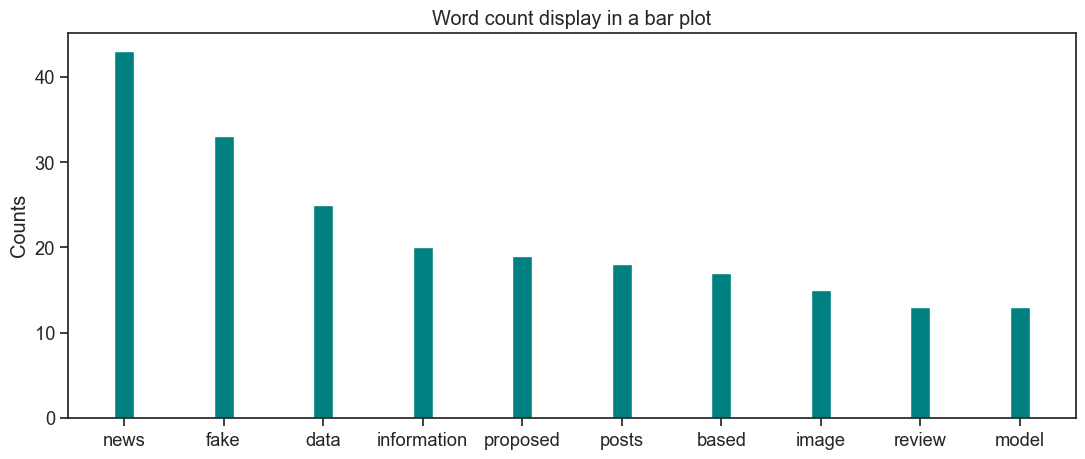

In [17]:
# Represent words count in bar plot

t = Counter(wordlist).most_common(10)
x = []
for a in t:
    x+=list(a) 
#     print(x)

def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
         
# Driver code
lst = x
# print(Convert(lst))

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = Convert(lst)
courses = list(data.keys())
values = list(data.values())
# print(courses)
fig = plt.figure(figsize = (13, 5))

# creating the bar plot
plt.bar(courses, values, color = 'teal', width = 0.2)

# plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Word count display in a bar plot")
plt.show()


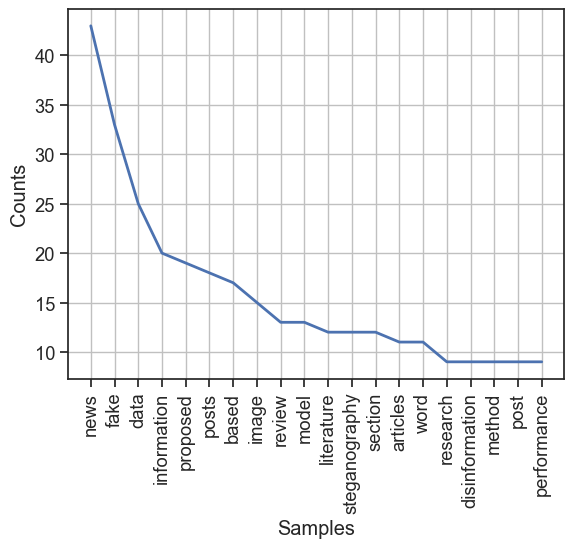

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
all_words=nltk.FreqDist(wordlist)
# print(all_words.most_common(100))
# print(type(all_words.most_common(100)))
all_words.plot(20)

# Creating Word Cloud

In [19]:
text = ' '.join(training_data)
# wordcloud = WordCloud(max_words=100).generate(text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/li

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/li

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

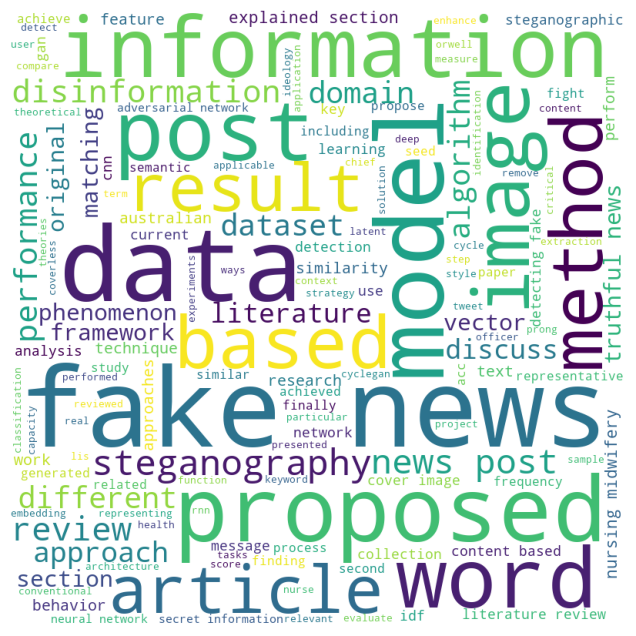

In [20]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# WordCloud in Topic level

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

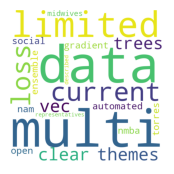

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

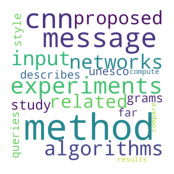

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


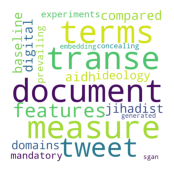

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wo

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

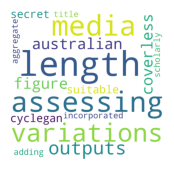

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wo

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

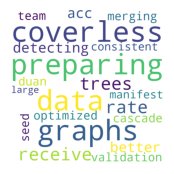

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wo

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


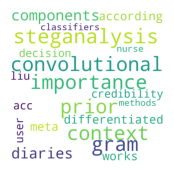

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


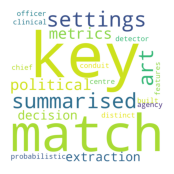

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda

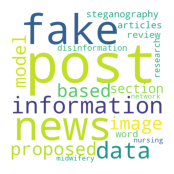

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation i

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

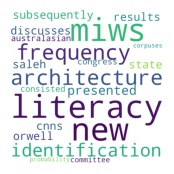

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wo

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation i

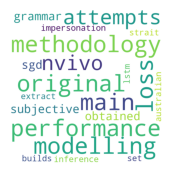

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/li

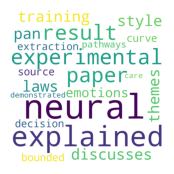

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

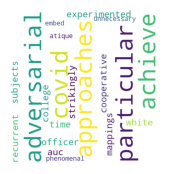

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

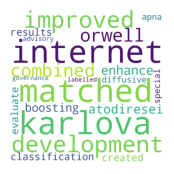

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/li

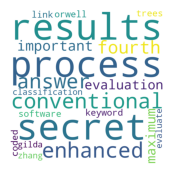

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

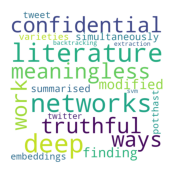

In [21]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
# t = pd.DataFrame(topics)
# t.head()
wc = []
for topic_number, topic in enumerate(topics):
#     print(f"✨Topic {topic_number}✨\n\n{topic}\n")
    text = ' '.join(topic)
# wordcloud = WordCloud(max_words=100).generate(text)
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
    wc.append(wordcloud)
# plot the WordCloud image                      
    plt.figure(figsize = (2, 2), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [22]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
# t = pd.DataFrame(topics)
# t.head()
for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")
     

✨Topic 0✨

['multi', 'data', 'limited', 'current', 'loss', 'themes', 'clear', 'vec', 'trees', 'gradient', 'open', 'automated', 'social', 'ensemble', 'nmba', 'nam', 'torres', 'midwives', 'representatives', 'described']

✨Topic 1✨

['cnn', 'message', 'methods', 'experiments', 'algorithms', 'input', 'networks', 'proposed', 'related', 'method', 'study', 'grams', 'describes', 'far', 'queries', 'unesco', 'style', 'compute', 'results', 'compare']

✨Topic 2✨

['document', 'terms', 'transe', 'measure', 'tweet', 'features', 'compared', 'baseline', 'aidh', 'digital', 'jihadist', 'ideology', 'domains', 'mandatory', 'prevailing', 'experiments', 'concealing', 'embedding', 'generated', 'sgan']

✨Topic 3✨

['length', 'assessing', 'media', 'variations', 'outputs', 'australian', 'figure', 'coverless', 'cyclegan', 'secret', 'suitable', 'incorporated', 'adding', 'aggregate', 'title', 'scholarly']

✨Topic 4✨

['coverless', 'data', 'preparing', 'graphs', 'receive', 'rate', 'trees', 'detecting', 'better', 'a

In [23]:
from tabulate import tabulate

df = pd.DataFrame(topics, columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic'+str(i) for i in range(1, 16)])
df.head()


Term1      Term2      Term3        Term4       Term5       Term6  \
Topic1      multi       data    limited      current        loss      themes   
Topic2        cnn    message    methods  experiments  algorithms       input   
Topic3   document      terms     transe      measure       tweet    features   
Topic4     length  assessing      media   variations     outputs  australian   
Topic5  coverless       data  preparing       graphs     receive        rate   

           Term7      Term8     Term9    Term10     Term11        Term12  \
Topic1     clear        vec     trees  gradient       open     automated   
Topic2  networks   proposed   related    method      study         grams   
Topic3  compared   baseline      aidh   digital   jihadist      ideology   
Topic4    figure  coverless  cyclegan    secret   suitable  incorporated   
Topic5     trees  detecting    better       acc  optimized          team   

           Term13      Term14      Term15       Term16      Term17  \
Topic1     social    ensemble        nmba          nam      torres   
Topic2  describes         far     queries       unesco       style   
Topic3    domains   mandatory  prevailing  experiments  concealing   
Topic4     adding   aggregate       title    scholarly        None   
Topic5    merging  validation        seed      cascade        duan   

            Term18           Term19     Term20  
Topic1    midwives  representatives  described  
Topic2     compute          results    compare  
Topic3   embedding        generated       sgan  
Topic4        None             None       None  
Topic5  consistent         manifest      large

In [24]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)
topic_distributions

[[0.03617947782342541,
  0.048209366992485805,
  0.01964109473783123,
  0.008049939698568655,
  0.0175841885240708,
  0.036670361487335525,
  0.02762712862109735,
  0.3719686405125103,
  0.03163901565094968,
  0.033663671365185645,
  0.125833569542557,
  0.033190064807330735,
  0.030171719127953762,
  0.127315238860512,
  0.05225652224818622],
 [0.03617947782342541,
  0.048209366992485805,
  0.01964109473783123,
  0.008049939698568655,
  0.0175841885240708,
  0.036670361487335525,
  0.02762712862109735,
  0.4575963520677322,
  0.03163901565094968,
  0.1192913829204076,
  0.04020585798733505,
  0.033190064807330735,
  0.030171719127953762,
  0.04168752730529005,
  0.05225652224818622],
 [0.03617947782342541,
  0.048209366992485805,
  0.01964109473783123,
  0.008049939698568655,
  0.10321190007929275,
  0.036670361487335525,
  0.02762712862109735,
  0.3719686405125103,
  0.11726672720617162,
  0.033663671365185645,
  0.04020585798733505,
  0.033190064807330735,
  0.030171719127953762,
  

In [25]:
# target_labels = ['Ahmad2020-SDE-Org-Sensemaking', 'Asso for Info Science   Tech - 2019 - Zhang - Cognitive mechanisms in sensemaking  A qualitative user study']
target_labels = files


In [26]:
import random
target_labels = random.sample(obit_titles, len(files))

# Heatmap Representation

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


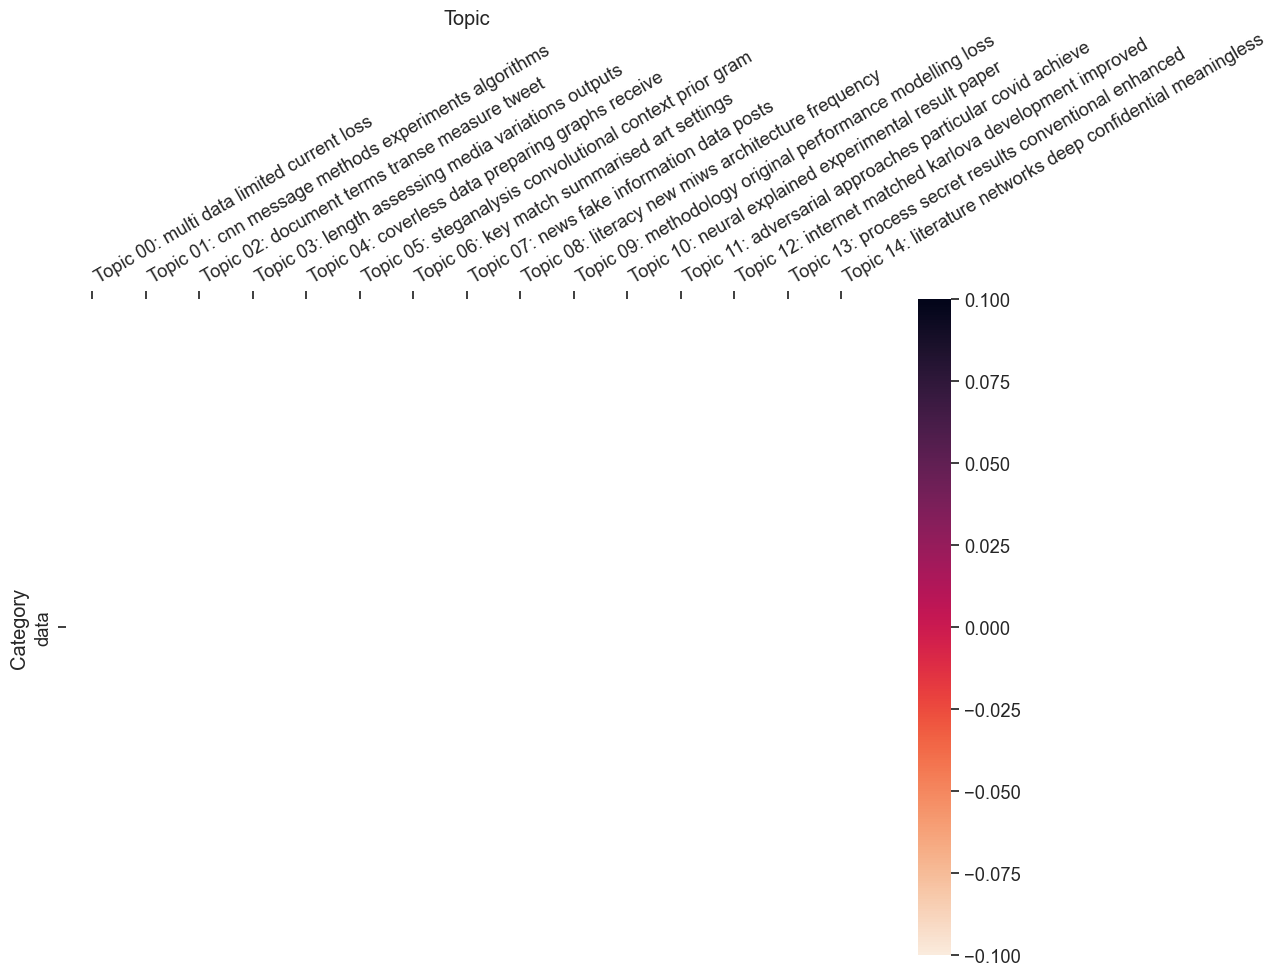

In [27]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 10)
                                     )

In [28]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [29]:
# def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
#     print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

#     for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
# #         print(document)
# #         print( training_data_obit_titles)
        
#         print(round(probability, 4), training_data_obit_titles[document] + "\n")
#     return

In [30]:
# display_top_titles_per_topic(topic_number=0, number_of_documents=5)

In [31]:
# display_top_titles_per_topic(topic_number=9, number_of_documents=5)

In [207]:
# display_top_titles_per_topic(topic_number=8, number_of_documents=7)

In [208]:
# from IPython.display import Markdown, display
# import re

# def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

#     for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
#         print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
#         probability = f"✨✨✨\n\n**{probability}**"
#         obit_title = f"**{training_data_obit_titles[document]}**"
#         original_text = training_data_original_text[document]
#         topic_words = topics[topic_number]
#         topic_words = custom_words if custom_words != None else topic_words

#         for word in topic_words:
#             if word in original_text:
#                 original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

#         display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
#     return

In [209]:
# display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

In [210]:
# display_bolded_topic_words_in_context(topic_number=8, number_of_documents=3)

# LSA Model

In [32]:
dt = ' '.join(training_data).split()
dt = [t.split(',') for t in dt]
id2word = Dictionary(dt)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in dt]
# print(corpus[:1])
# print(type(wordlist))
# print(len(wordlist))

In [33]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# find the coherence score with a different number of topics
for i in range(2,11):
    lsi = LsiModel(corpus, num_topics=i, id2word=id2word)    
    coherence_model = CoherenceModel(model=lsi, texts=dt, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 2 clusters: 0.8621859448125749


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 3 clusters: 0.8535858846815906


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 4 clusters: 0.8504751695635786


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 5 clusters: 0.8483200621799754


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 6 clusters: 0.8479225346941984


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 7 clusters: 0.8452925685910524


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 8 clusters: 0.8437256164482352


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 9 clusters: 0.8424757550379867


/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


Coherence score with 10 clusters: 0.8390871653802779


In [34]:
from gensim.models import LsiModel

lsamodel = LsiModel(corpus=corpus, num_topics=250, id2word=id2word)
# print(lsamodel.num_topics)
print(lsamodel.print_topics(num_topics=250))

/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:926: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


[(0, '1.000*"news" + -0.000*"coded" + 0.000*"built" + -0.000*"carry" + -0.000*"slew" + 0.000*"gaps" + 0.000*"impersonation" + -0.000*"trace" + 0.000*"better" + 0.000*"extract"'), (1, '-1.000*"fake" + 0.000*"conceals" + 0.000*"measurement" + 0.000*"aim" + 0.000*"incorporating" + -0.000*"fakesafe" + 0.000*"encrypted" + -0.000*"knowledge" + 0.000*"relationship" + -0.000*"incorporates"'), (2, '-1.000*"data" + -0.000*"obtained" + -0.000*"article" + -0.000*"nurse" + 0.000*"quality" + -0.000*"convert" + -0.000*"grams" + -0.000*"engenders" + -0.000*"affect" + -0.000*"aidh"'), (3, '-1.000*"information" + -0.000*"varieties" + 0.000*"diaries" + 0.000*"bdt" + 0.000*"form" + -0.000*"pronged" + -0.000*"publications" + 0.000*"term" + -0.000*"coded" + -0.000*"inadequate"'), (4, '-1.000*"proposed" + -0.000*"depth" + -0.000*"reconstruct" + 0.000*"progressively" + 0.000*"identical" + -0.000*"premeditated" + -0.000*"staganalysis" + 0.000*"published" + -0.000*"scholar" + -0.000*"credibility"'), (5, '-1.000

In [35]:
pprint(lsamodel.show_topics(formatted=False))

[(0,
  [('news', 0.9999999838339886),
   ('coded', -2.400504358378506e-05),
   ('built', 2.0349611022477435e-05),
   ('carry', -2.007333918502138e-05),
   ('slew', -1.963307275642594e-05),
   ('gaps', 1.8392583490597882e-05),
   ('impersonation', 1.8361526521869018e-05),
   ('trace', -1.8073739593114573e-05),
   ('better', 1.7794394840384844e-05),
   ('extract', 1.5725869318773602e-05)]),
 (1,
  [('fake', -0.9999999216567556),
   ('conceals', 4.4402097887268975e-05),
   ('measurement', 4.381652282041679e-05),
   ('aim', 4.30993305782161e-05),
   ('incorporating', 4.275892957160762e-05),
   ('fakesafe', -4.054263224700331e-05),
   ('encrypted', 3.9629011805698586e-05),
   ('knowledge', -3.9526971458000096e-05),
   ('relationship', 3.925648594982267e-05),
   ('incorporates', -3.783487634032566e-05)]),
 (2,
  [('data', -0.9999997411568058),
   ('obtained', -8.874752833331081e-05),
   ('article', -7.897885932519228e-05),
   ('nurse', -7.75554809534467e-05),
   ('quality', 7.36142550107005e

In [36]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('answer', 1)]]

In [37]:
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=250, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



[(121,
  '0.001*"ensures" + 0.001*"strikingly" + 0.001*"infeasible" + '
  '0.001*"eavesdrop" + 0.001*"resistance" + 0.001*"cascade" + 0.001*"fakesafe" '
  '+ 0.001*"multi" + 0.001*"functions" + 0.001*"mappings"'),
 (0,
  '0.001*"ensures" + 0.001*"strikingly" + 0.001*"infeasible" + '
  '0.001*"eavesdrop" + 0.001*"resistance" + 0.001*"cascade" + 0.001*"fakesafe" '
  '+ 0.001*"multi" + 0.001*"functions" + 0.001*"mappings"'),
 (239,
  '0.001*"ensures" + 0.001*"strikingly" + 0.001*"infeasible" + '
  '0.001*"eavesdrop" + 0.001*"resistance" + 0.001*"cascade" + 0.001*"fakesafe" '
  '+ 0.001*"multi" + 0.001*"functions" + 0.001*"mappings"'),
 (242,
  '0.001*"ensures" + 0.001*"strikingly" + 0.001*"infeasible" + '
  '0.001*"eavesdrop" + 0.001*"resistance" + 0.001*"cascade" + 0.001*"fakesafe" '
  '+ 0.001*"multi" + 0.001*"functions" + 0.001*"mappings"'),
 (162,
  '0.001*"ensures" + 0.001*"strikingly" + 0.001*"infeasible" + '
  '0.001*"eavesdrop" + 0.001*"resistance" + 0.001*"cascade" + 0.001*"fakes

In [38]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=dt, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.8714206088257436


In [39]:
topics_lsa = [[(term, round(wt, 3)) for term, wt in lsamodel.show_topic(n, topn=16)] for n in range(0, lsamodel.num_topics)]
topics_lsa


[[('news', 1.0),
  ('coded', -0.0),
  ('built', 0.0),
  ('carry', -0.0),
  ('slew', -0.0),
  ('gaps', 0.0),
  ('impersonation', 0.0),
  ('trace', -0.0),
  ('better', 0.0),
  ('extract', 0.0),
  ('supremacist', 0.0),
  ('attention', -0.0),
  ('consistent', -0.0),
  ('topics', 0.0),
  ('reported', -0.0),
  ('arrive', -0.0)],
 [('fake', -1.0),
  ('conceals', 0.0),
  ('measurement', 0.0),
  ('aim', 0.0),
  ('incorporating', 0.0),
  ('fakesafe', -0.0),
  ('encrypted', 0.0),
  ('knowledge', -0.0),
  ('relationship', 0.0),
  ('incorporates', -0.0),
  ('community', -0.0),
  ('occurring', 0.0),
  ('reports', -0.0),
  ('hidden', -0.0),
  ('publishing', 0.0),
  ('general', -0.0)],
 [('data', -1.0),
  ('obtained', -0.0),
  ('article', -0.0),
  ('nurse', -0.0),
  ('quality', 0.0),
  ('convert', -0.0),
  ('grams', -0.0),
  ('engenders', -0.0),
  ('affect', -0.0),
  ('aidh', -0.0),
  ('carried', 0.0),
  ('embedding', 0.0),
  ('laws', 0.0),
  ('works', -0.0),
  ('ternary', 0.0),
  ('sender', 0.0)],
 [

In [40]:
# print(topics_lsa)

In [41]:
topics_df1 = pd.DataFrame(topics_lsa)
topics_df1.head()

0                  1                    2   \
0          (news, 1.0)      (coded, -0.0)         (built, 0.0)   
1         (fake, -1.0)    (conceals, 0.0)   (measurement, 0.0)   
2         (data, -1.0)   (obtained, -0.0)      (article, -0.0)   
3  (information, -1.0)  (varieties, -0.0)       (diaries, 0.0)   
4     (proposed, -1.0)      (depth, -0.0)  (reconstruct, -0.0)   

                     3                     4                     5   \
0         (carry, -0.0)          (slew, -0.0)           (gaps, 0.0)   
1            (aim, 0.0)  (incorporating, 0.0)      (fakesafe, -0.0)   
2         (nurse, -0.0)        (quality, 0.0)       (convert, -0.0)   
3            (bdt, 0.0)           (form, 0.0)       (pronged, -0.0)   
4  (progressively, 0.0)      (identical, 0.0)  (premeditated, -0.0)   

                     6                  7                    8   \
0  (impersonation, 0.0)      (trace, -0.0)        (better, 0.0)   
1      (encrypted, 0.0)  (knowledge, -0.0)  (relationship, 0.0)   
2         (grams, -0.0)  (engenders, -0.0)       (affect, -0.0)   
3  (publications, -0.0)        (term, 0.0)        (coded, -0.0)   
4  (staganalysis, -0.0)   (published, 0.0)      (scholar, -0.0)   

                     9                   10                 11  \
0        (extract, 0.0)  (supremacist, 0.0)  (attention, -0.0)   
1  (incorporates, -0.0)   (community, -0.0)   (occurring, 0.0)   
2          (aidh, -0.0)      (carried, 0.0)   (embedding, 0.0)   
3    (inadequate, -0.0)    (achieves, -0.0)    (conclude, 0.0)   
4   (credibility, -0.0)     (reports, -0.0)      (torres, 0.0)   

                   12                 13                 14  \
0  (consistent, -0.0)      (topics, 0.0)   (reported, -0.0)   
1     (reports, -0.0)     (hidden, -0.0)  (publishing, 0.0)   
2         (laws, 0.0)      (works, -0.0)     (ternary, 0.0)   
3         (cnmo, 0.0)   (corpuses, -0.0)   (smallest, -0.0)   
4     (allowing, 0.0)  (multimedia, 0.0)   (questions, 0.0)   

                    15  
0       (arrive, -0.0)  
1      (general, -0.0)  
2        (sender, 0.0)  
3   (innovative, -0.0)  
4  (cryptography, 0.0)

In [45]:
from tabulate import tabulate

df = pd.DataFrame([[term for term, wt in topic] for topic in topics_lsa], columns=['Term'+str(i) for i in range(1, 17)], index=['Topic'+str(i) for i in range(1, 251)])
df.head()


Term1      Term2        Term3          Term4          Term5  \
Topic1         news      coded        built          carry           slew   
Topic2         fake   conceals  measurement            aim  incorporating   
Topic3         data   obtained      article          nurse        quality   
Topic4  information  varieties      diaries            bdt           form   
Topic5     proposed      depth  reconstruct  progressively      identical   

               Term6          Term7      Term8         Term9        Term10  \
Topic1          gaps  impersonation      trace        better       extract   
Topic2      fakesafe      encrypted  knowledge  relationship  incorporates   
Topic3       convert          grams  engenders        affect          aidh   
Topic4       pronged   publications       term         coded    inadequate   
Topic5  premeditated   staganalysis  published       scholar   credibility   

             Term11     Term12      Term13      Term14      Term15  \
Topic1  supremacist  attention  consistent      topics    reported   
Topic2    community  occurring     reports      hidden  publishing   
Topic3      carried  embedding        laws       works     ternary   
Topic4     achieves   conclude        cnmo    corpuses    smallest   
Topic5      reports     torres    allowing  multimedia   questions   

              Term16  
Topic1        arrive  
Topic2       general  
Topic3        sender  
Topic4    innovative  
Topic5  cryptography

In [46]:
import gensim

from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.066*"posts" + 0.052*"data" + 0.030*"original" + 0.030*"proposed" + '
  '0.022*"seed" + 0.015*"chief" + 0.015*"hidden" + 0.015*"techniques" + '
  '0.015*"steganalysis" + 0.015*"propose"'),
 (1,
  '0.027*"posts" + 0.018*"users" + 0.018*"framework" + 0.018*"results" + '
  '0.018*"performance" + 0.018*"malicious" + 0.018*"section" + 0.018*"image" + '
  '0.018*"data" + 0.018*"secret"'),
 (2,
  '0.086*"data" + 0.061*"information" + 0.026*"paper" + 0.026*"phenomenon" + '
  '0.018*"finally" + 0.018*"consulted" + 0.018*"analysis" + 0.018*"behavior" + '
  '0.009*"applications" + 0.009*"helped"'),
 (3,
  '0.036*"including" + 0.036*"idf" + 0.027*"representing" + 0.027*"similarity" '
  '+ 0.018*"cyclegan" + 0.018*"identifying" + 0.018*"capacity" + 0.018*"word" '
  '+ 0.009*"symmetric" + 0.009*"tang"'),
 (4,
  '0.053*"image" + 0.031*"midwifery" + 0.031*"detection" + 0.023*"gans" + '
  '0.023*"nursing" + 0.015*"security" + 0.015*"translation" + '
  '0.015*"experiments" + 0.015*"discuss" + 0

In [47]:
#import o
warnings.filterwarnings('ignore')

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)


/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [48]:
pyLDAvis.display(LDAvis_prepared)